<a href="https://colab.research.google.com/github/weal2937/Predicting-Survival-on-Titanic-using-ML/blob/main/predicting_titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Machine Learning to Predict the Survival of Passengers on the Titanic

The goal of this project was to further my experience working with the Tensorflow library and also develop my data manipulation skills. I used the standard titanic dataset from seaborn, and after some manipulation, fed the data into a Sequential Neural Network. I then tested the model on a portion of unseen data from the dataset and received an 99% accuracy score. 

In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf 
from tensorflow import keras

The code above imports the necessary libraries for this project. numpy and pandas will assist in data handling. matplotlib and seaborn will assist  in data visualization. sklearn will assist with data preprocessing and model evaluation. Tensorflow and keras will assist with developing our neural network.

In [26]:
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()
titanic.describe()
print(titanic.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'em

Using Seaborn's built-in Titanic dataset, I first explored the data to get a feel for what I was working with. I observed that the dataset has 891 entries and 15 columns for each. It also displays the data type for each of the columns as well as the memory being occupied by the data frame.

In [27]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic = pd.get_dummies(titanic, drop_first=True)
X = titanic.drop('survived', axis=1)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Of my 891 entries, only 714 have a non-null age value. To get around this, I simply replaced all of the missing age values with the median age of the data frame. In order for the data to be fit for the NN, I had to convert each of the categorical variables to dummy variables using one-hot encoding. I then assigned a copy of the data frame stripped of the'survived' column to X and assign the 'survived' column to y. y will serve as the target variable. The train_test_split() function is used to split the dataset into training and test subsets where 20% of the entries are allocated to the testing set and 80% to the training set. I then scaled the data to have zero mean and unit variance using the StandardScaler() class. 

In [28]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
18/18 [==============================] - 1s 16ms/step - loss: 0.6557 - accuracy: 0.6960 - val_loss: 0.5039 - val_accuracy: 0.8951
Epoch 2/15
18/18 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.9104 - val_loss: 0.3257 - val_accuracy: 0.9371
Epoch 3/15
18/18 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.9209 - val_loss: 0.2081 - val_accuracy: 0.9441
Epoch 4/15
18/18 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy: 0.9613 - val_loss: 0.1278 - val_accuracy: 0.9860
Epoch 5/15
18/18 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9877 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 6/15
18/18 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9982 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 7/15
18/18 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 8/15
18/18 [=

Now for the fun part. I initialized a Sequential model in the first line. The model has 3 dense layers. The first and second each have 64 neurons and uses the ReLU activation function. The last layer has only neuron and uses the sigmoid activartion function. This will be the neurons that is activated if the entity is predicted to survive and is not activated if they are not predicted to survive. I compiled the model using the adam optimizer and the binary_crossentropy loss function. The model will be evaluated based on accuracy. Lastly, I trained the model for 15 epochs and assign the History object returned from the model.fit(...) function to the variable history. 

6/6 [==============================] - 0s 2ms/step
Accuracy:  0.994413407821229


<Axes: >

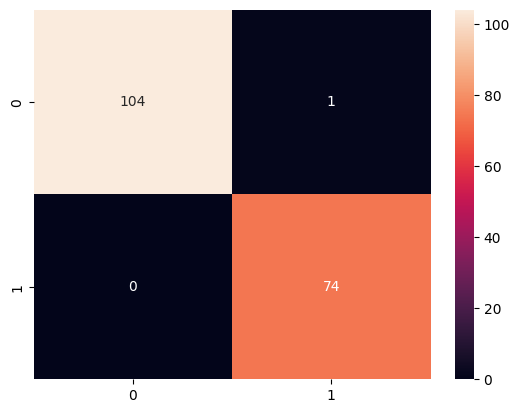

In [29]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

My model received an 99% accuracy on the test data, meaning that it correctly predicted whether a passenger on the titanic survived or not. Overall, I'm proud of the performance of the model. I enjoyed the data manipulation of this project the most, and I'm excited for many more projects in the future.